In [1]:
#Import Library
import pandas as pd

In [2]:
#Data Collection

In [5]:
iris_data = pd.read_csv("Iris (1).csv")

In [6]:
#print(iris_data)
#iris_data.sample(5)
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Data Cleaning
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#Label Encoding
# Iris-setosa = 0 , Iris-versicolor = 1, Iris-virginica = 2

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

iris_data['Species'] = encoder.fit_transform(iris_data['Species'])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
iris_data.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


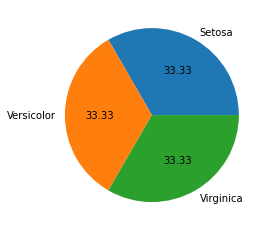

In [10]:
#Data Analysis
import matplotlib.pyplot as plt

plt.pie(iris_data['Species'].value_counts(),labels=['Setosa','Versicolor','Virginica'],autopct='%0.2f')
plt.show()

In [11]:
#Create Dependent & Independent variable
x = iris_data.drop('Species',axis=1)
y = iris_data['Species']


In [12]:
print(x)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


In [14]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32


In [15]:
#Split data into Train and test dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [16]:
#Train the model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [17]:
#Predict train data

pred_train = model.predict(x_train)

In [18]:
#Check accuracy on train data

from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_train,pred_train)

1.0

In [19]:
#Predict test data

pred_test = model.predict(x_test)

In [20]:
#Check accuracy and print Confusion matrix

accuracy_score(y_test,pred_test)

1.0

In [21]:
confusion_matrix(y_test,pred_test)

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  8]], dtype=int64)